# 📊 Отчет по лабораторной работе №1

## 🎯 Цель работы
Освоение базовых операций с библиотекой `pandas` и визуализация данных с использованием `matplotlib` на примере датасета `Stores.csv`.


# 🔹 Загрузка и сохранение данных
- Использован `pd.read_csv` для загрузки.
- Файл успешно сохранён обратно с помощью `to_csv`.


In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Stores.csv")
df.to_csv("Stores_saved.csv", index=False)  
df.head()


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## 📌 Пункт 7: Основные операции Pandas

# 🔹 Получение сведений о датафрейме
- `.info()` — типы столбцов, количество непустых значений.
- `.describe()` — основные статистики.

In [41]:

# Сведения о датафрейме
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB
None
         Store ID   Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000  

# 🔹 Получение сведений о колонках датафрейма

In [42]:
# Колонки
print("Названия колонок:", df.columns)
print("Типы данных:", df.dtypes)


Названия колонок: Index(['Store ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')
Типы данных: Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object


# 🔹 Вывод отдельных строк и столбцов
- Вывод отдельных столбцов и строк (`df['column']`, `df.iloc[]`).
- Срезы и диапазоны строк.

In [43]:
# Отдельные строки и столбцы
print("Один столбец:", df['Store_Sales'].head())
print("Несколько столбцов:", df[['Store_Area', 'Items_Available']].head())
print("Одна строка:", df.iloc[0])
print("Диапазон строк:", df.iloc[10:15])

Один столбец: 0    66490
1    39820
2    54010
3    53730
4    46620
Name: Store_Sales, dtype: int64
Несколько столбцов:    Store_Area  Items_Available
0        1659             1961
1        1461             1752
2        1340             1609
3        1451             1748
4        1770             2111
Одна строка: Store ID                    1
Store_Area               1659
Items_Available          1961
Daily_Customer_Count      530
Store_Sales             66490
Name: 0, dtype: int64
Диапазон строк:     Store ID  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
10        11        1187             1439                  1090        71280
11        12        1751             2098                   720        57620
12        13        1746             2064                  1050        60470
13        14        1615             1931                  1160        59130
14        15        1469             1756                   770        66360


# 🔹 Группировка и агрегация
- Добавлена категориальная переменная `sales_category` на основе `store_sales`.
- Проведена агрегация по категориям (`mean`, `sum`).

In [44]:

df['Sales_Category'] = pd.cut(df['Store_Sales'], bins=[0, 50000, 80000, float('inf')],
                              labels=['Low', 'Medium', 'High'])

grouped = df.groupby('Sales_Category').agg({
    'Store_Area': 'mean',
    'Items_Available': 'sum',
    'Daily_Customer_Count': 'mean'
})
print(grouped)


                 Store_Area  Items_Available  Daily_Customer_Count
Sales_Category                                                    
Low             1451.862543           506627            771.099656
Medium          1499.804878           885458            793.780488
High            1509.123894           204619            793.274336


/var/folders/p6/r32qltw96svfm2vd1xbhhm9h0000gn/T/ipykernel_9946/1184871691.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Sales_Category').agg({


# 🔹 Сортировка данных
- `sort_values(by='store_sales')` — магазины отсортированы по выручке.

In [45]:

sorted_df = df.sort_values(by='Store_Sales', ascending=False)
print(sorted_df.head())


     Store ID  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
649       650        1989             2414                   860       116320   
868       869        1775             2104                   980       105150   
432       433        1365             1638                   680       102920   
408       409        1303             1587                  1310       102310   
758       759        1486             1758                   820       101820   

    Sales_Category  
649           High  
868           High  
432           High  
408           High  
758           High  


# 🔹 Удаление строк/столбцов
- Удалены строки и столбцы (`drop`).
- Добавлен столбец `sales_per_customer`.

In [46]:

df_drop_col = df.drop(columns=['Store ID'])
df_drop_row = df.drop(index=[0])
print("Колонки после удаления:", df_drop_col.columns)
print("Строки после удаления:", df_drop_row.head())


Колонки после удаления: Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales',
       'Sales_Category'],
      dtype='object')
Строки после удаления:    Store ID  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
1         2        1461             1752                   210        39820   
2         3        1340             1609                   720        54010   
3         4        1451             1748                   620        53730   
4         5        1770             2111                   450        46620   
5         6        1442             1733                   760        45260   

  Sales_Category  
1            Low  
2         Medium  
3         Medium  
4            Low  
5            Low  


# 🔹 Создание новых столбцов

In [47]:

df['Sales_per_Customer'] = df['Store_Sales'] / df['Daily_Customer_Count']
df[['Store_Sales', 'Daily_Customer_Count', 'Sales_per_Customer']].head()


,Store_Sales,Daily_Customer_Count,Sales_per_Customer
0,66490,530,125.452830
1,39820,210,189.619048
2,54010,720,75.013889
3,53730,620,86.661290
4,46620,450,103.600000


# 🔹 Заполнение пустых значений на основе существующих данных и удаление строк с пустыми значениями
- Продемонстрировано удаление строк с `NaN`.
- Заполнение средним значением для колонки `store_area`.

In [48]:
df_nan = df.copy()
df_nan.loc[0:2, 'Store_Area'] = np.nan

df_clean = df_nan.dropna()

# Заполняем только колонку 'Store_Area'
df_filled = df_nan.copy()
df_filled['Store_Area'] = df_filled['Store_Area'].fillna(df_nan['Store_Area'].mean())

print("Удаленные NaN:", df_clean.shape)
print("Заполненные NaN:", df_filled.loc[0:2, 'Store_Area'])


Удаленные NaN: (893, 7)
Заполненные NaN: 0    1485.405375
1    1485.405375
2    1485.405375
Name: Store_Area, dtype: float64


## 📊 Пункт 8: Визуализация данных с Pandas и Matplotlib

- **Линейная диаграмма** по `store_sales`.
- **Столбчатая диаграмма** — топ-10 магазинов по продажам.
- **Гистограмма** — распределение площади магазина.
- **Boxplot** — анализ выбросов по `store_sales`.
- **Area Chart** — площадь и товары на первых 15 магазинах.
- **Scatter Plot** — зависимость `store_sales` от `store_area`.


# 🔹 Линейная диаграмма (plot)

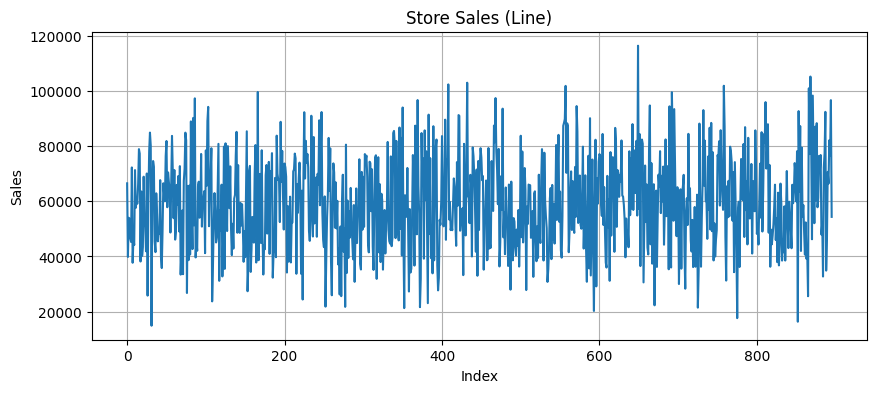

In [49]:

df["Store_Sales"].plot(title="Store Sales (Line)", figsize=(10, 4))
plt.xlabel("Index")
plt.ylabel("Sales")
plt.grid()
plt.show()


# 🔹 Столбчатая диаграмма (bar)

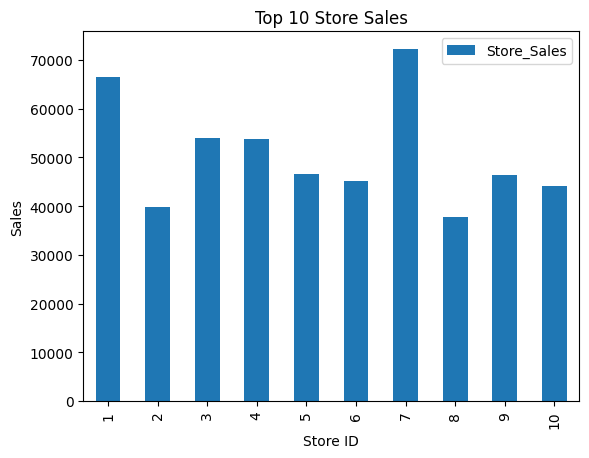

In [50]:

df.head(10).plot(kind="bar", x="Store ID", y="Store_Sales", title="Top 10 Store Sales")
plt.ylabel("Sales")
plt.show()


# 🔹 Гистограмма (hist)

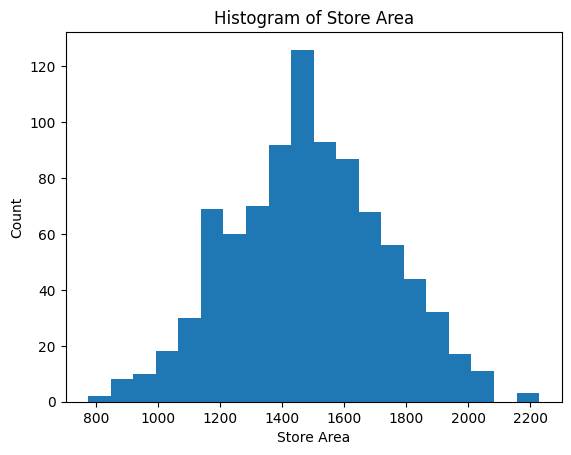

In [51]:

df["Store_Area"].hist(bins=20)
plt.title("Histogram of Store Area")
plt.xlabel("Store Area")
plt.ylabel("Count")
plt.grid()
plt.show()


# 🔹 Ящик с усами (box)

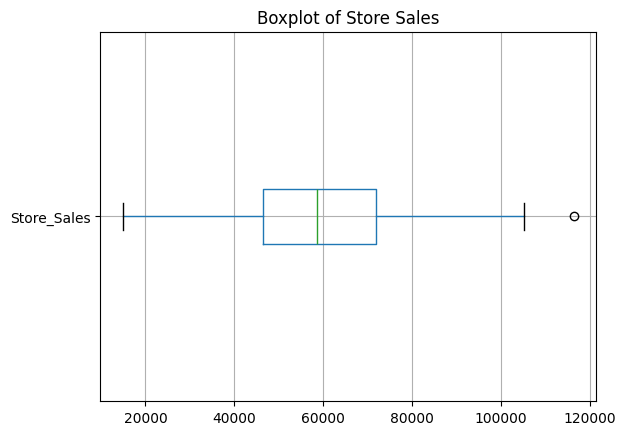

In [52]:

df.boxplot(column="Store_Sales", vert=False)
plt.title("Boxplot of Store Sales")
plt.show()


# 🔹 Диаграмма с областями (area)

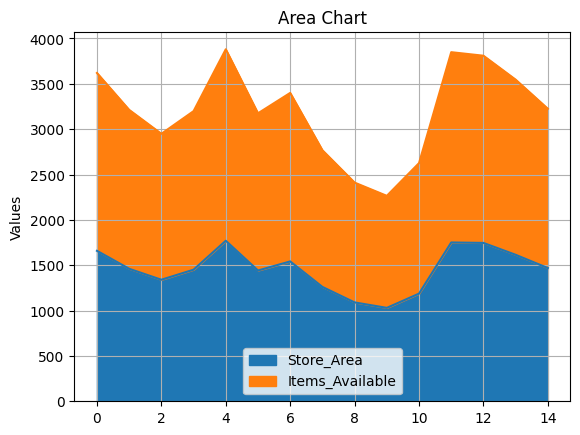

In [53]:

df[["Store_Area", "Items_Available"]].head(15).plot.area(title="Area Chart")
plt.ylabel("Values")
plt.grid()
plt.show()


# 🔹 Диаграмма рассеяния (scatter)

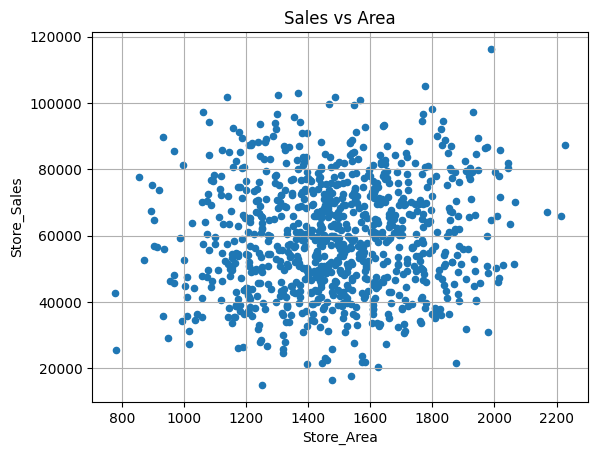

In [54]:

df.plot.scatter(x="Store_Area", y="Store_Sales", title="Sales vs Area")
plt.grid()
plt.show()


# 🔹 Круговая диаграмма (pie)

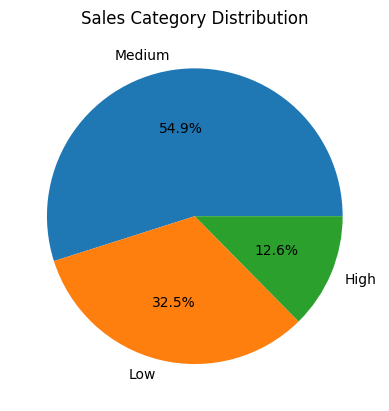

In [55]:

df['Sales_Category'].value_counts().plot.pie(autopct="%1.1f%%", title="Sales Category Distribution")
plt.ylabel("")
plt.show()


##  Вывод

В рамках лабораторной работы №1 были освоены основные методы работы с библиотеками `pandas` и `matplotlib` для анализа табличных данных.

 В результате работы:
-  Загружен и сохранён датасет `Stores.csv`.
-  Изучена структура датафрейма: типы данных, размеры, названия столбцов.
-  Выполнены основные операции:
  - извлечение строк и столбцов,
  - сортировка и группировка,
  - удаление и добавление новых столбцов,
  - обработка пропущенных значений (удаление и заполнение).
-  Построены различные типы графиков:
  - линейные (`plot`),
  - столбчатые (`bar`),
  - гистограммы (`hist`),
  - диаграммы рассеяния (`scatter`),
  - диаграммы с областями (`area`),
  - диаграммы "ящик с усами" (`boxplot`).

 Эти навыки являются фундаментальными при предварительном анализе данных (EDA) и позволяют лучше понимать структуру и закономерности внутри датасета.

 Полученные результаты показывают, что `pandas` и `matplotlib` — мощные инструменты для подготовки данных и их визуального анализа.

 https://github.com/Ipilot7/datasince.git
